In [2]:
import pandas as pd

In [3]:
episodes_df = pd.read_pickle('episodes_df.pkl')

In [4]:
episodes_df.reset_index(inplace=True)

In [5]:
corpus = episodes_df['ep_summary'].tolist()
len(corpus)

380

### Add season column to episodes dataframe

In [6]:
episodes_df['season'] = None
for i in range(0,6):
    episodes_df['season'][i] = 1

for i in range(6,30):
    episodes_df['season'][i] = 2
    
for i in range(30,55):
    episodes_df['season'][i] = 3
    
for i in range(55,72):
    episodes_df['season'][i] = 4
    
for i in range(72,96):
    episodes_df['season'][i] = 5
    
for i in range(96,120):
    episodes_df['season'][i] = 6
    
for i in range(120,142):
    episodes_df['season'][i] = 7
    
for i in range(142,166):
    episodes_df['season'][i] = 8
    
for i in range(166,190):
    episodes_df['season'][i] = 9
    
for i in range(190,214):
    episodes_df['season'][i] = 10
    
for i in range(214,238):
    episodes_df['season'][i] = 11
    
for i in range(238,262):
    episodes_df['season'][i] = 12
    
for i in range(262,286):
    episodes_df['season'][i] = 13
    
for i in range(286,310):
    episodes_df['season'][i] = 14
    
for i in range(310,335):
    episodes_df['season'][i] = 15
    
for i in range(335,356):
    episodes_df['season'][i] = 16
    
for i in range(356,373):
    episodes_df['season'][i] = 17
    
for i in range(373,380):
    episodes_df['season'][i] = 18

/var/folders/b6/36rxxyj90cvfwlypjf8jdp_r0000gn/T/ipykernel_47356/2150409087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episodes_df['season'][i] = 1
/var/folders/b6/36rxxyj90cvfwlypjf8jdp_r0000gn/T/ipykernel_47356/2150409087.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episodes_df['season'][i] = 2
/var/folders/b6/36rxxyj90cvfwlypjf8jdp_r0000gn/T/ipykernel_47356/2150409087.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [7]:
episodes_df['ep_name'][379]

'No Time to Die'

### Remove Numbers and Punctuation

In [8]:
# Remove punctuation
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for i in range(len(corpus)):
    for element in corpus[i]:
        if element in punc:
            corpus[i] = corpus[i].replace(element, "")

In [9]:
# Remove special python character
for i in range(len(corpus)):
    for element in corpus[i]:
        corpus[i] = corpus[i].replace(u'\xa0', u' ')

In [10]:
# Remove digits
dig = '''1234567890'''
for i in range(len(corpus)):
    for element in corpus[i]:
        if element in dig:
            corpus[i] = corpus[i].replace(element, "")

### Lemmatize & Stop Words

In [49]:
# Create dictionary of words to add to lemmatizer
lemma_dict = {"agrees":"agree", "gsw":"gunshot", "gun":"gunshot", "asks":"ask",
              "asked":"ask", "asking":"ask", "operates":"operate", "performs":"perform", 
              "performing":"perform", "performed":"perform","talking":"talk", "talks":"talk", 
              "talked":"talk", "saying":"say", "accepts":"accept", "pregnancy":"pregnant", "marrying":"marry",
             "shooter":"shooting", "shoot":"shooting", "arrives":"arrive", "therapist":"therapy"}

In [97]:
# Create list of additional stop words that are relevant to too many episodes
add_stopwords = ['room', 'or', 'patient', 'doctor', 'hospital', 'chief', 'er', 'jane', 'john',
                'iv', 'ha', 'leaf', 'wa', 'test', 'doe', 'case', 'would', 'dr', 'coffee', 'gon',
                'coffee', 'mother', 'father', 'son', 'daughter', 'sister', 'brother', 'grandfather', 
                'grandmother', 'other', 'others', 'mom', 'dad', 'couldve', 'wouldve', 'na', 'hed',
                'itll', 'clinic', 'chart', 'however', 'boyfriend', 'girlfriend', 'wife', 'husband']

In [98]:
# Remove punctuation from nltk list of stop words
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for i in range(len(eng_stopwords)):
    for element in eng_stopwords[i]:
        if element in punc:
            eng_stopwords[i] = eng_stopwords[i].replace(element, "")

In [99]:
eng_stopwords[8:15]

['you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours']

In [100]:
print(eng_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [101]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [102]:
# Lemmatize
corpus_clean = []

for i in range(len(corpus)):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(corpus[i])
    tokens_lemma = [lemmatizer.lemmatize(y) for y in tokens]
    tokens_lemma = [x if x not in lemma_dict else lemma_dict[x] for x in tokens_lemma]
    text_lemma = " ".join(tokens_lemma)
    corpus_clean.append(text_lemma.strip())

In [103]:
# First, proper nouns (need upper case to identify). Then make everything lower case before removing stop words
from nltk import pos_tag
eng_stopwords.extend(add_stopwords)

for i in range(len(corpus_clean)):       

    # proper nouns
    tokens = word_tokenize(corpus_clean[i])
    tagged = pos_tag(tokens)
    propnouns = []
    for (word, tag) in tagged:
        if tag=='NNP':
            if word not in ['FDA', 'ICU', 'PICU', 'ECMO']:
                propnouns.append(word)
    tokens_temp = [word for word in tokens if word not in propnouns]

    # make lower case
    for x in range(len(tokens_temp)):
        tokens_temp[x] = tokens_temp[x].lower()
        
    # stop words 
    tokens_clean = [word for word in tokens_temp if word not in eng_stopwords]

    # compile back into text summary
    text_clean = " ".join(tokens_clean)
    corpus_clean[i] = text_clean.strip()


### Check Top Words Overall

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=eng_stopwords)
X = cv.fit_transform(corpus_clean)
X.shape

words = list(cv.get_feature_names_out())
counts = list(sum(X.toarray()))
word_counts = list(zip(words, counts))
pd.DataFrame(word_counts).sort_values(by=1,ascending=False).head(10)

,0,1
11267,say,24024
700,ask,10986
13104,tell,10233
14343,want,6245
5504,get,5812
5576,go,4529
2432,come,4485
7186,know,4106
13009,talk,3635
8411,need,3577


In [105]:
print(len(corpus_clean))
print(sum([len(d.split(' ')) for d in corpus_clean]))

380
485879


### Vectorize with TFIDF

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [107]:
vectorizer = TfidfVectorizer(ngram_range=(1,1),
                             stop_words=eng_stopwords,
                             max_df=.5,
                             min_df=.01) 
X = vectorizer.fit_transform(corpus_clean)
X.shape

(380, 5576)

In [108]:
words = list(vectorizer.get_feature_names_out())
counts = list(sum(X.toarray()))
word_counts = list(zip(words, counts))
pd.DataFrame(word_counts).sort_values(by=1,ascending=False).head()

,0,1
5204,tumor,11.991547
5449,wedding,8.962177
546,board,8.371065
2847,leg,8.055381
158,ambulance,7.821484


In [109]:
X_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
X_df.head()

,aback,abandon,abandoned,abdomen,abdominal,ability,ablation,able,abnormal,abnormality,...,yoga,yogurt,young,younger,youth,zero,zip,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016344,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.037731,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038824,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026870,0.0,0.0,...,0.0,0.0,0.037566,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### Fit NMF 

In [110]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=13)
nmf_vecs = nmf.fit_transform(X_df) 

len(nmf_vecs)

/Users/melanieackerman/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


380

In [111]:
# Episodes per topic over all seasons
import numpy as np
topic, episode_count = np.unique(nmf_vecs.argmax(axis = 1), return_counts=True)   # Num of eps in each topic
topic_count_df = pd.DataFrame(list(zip(topic,episode_count)))
topic_count_df = topic_count_df.drop([0],axis=1)
topic_count_df = topic_count_df.rename({1:"num_eps"},axis=1)
topic_count_df

,num_eps
0,73
1,13
2,24
3,9
4,10
5,15
6,43
7,59
8,43
9,13


In [112]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "Topic #%d: " % index
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message, "\n")

In [113]:
# Print out topics
words = list(X_df.columns.values)
print_top_words(model=nmf,feature_names=words,n_top_words=40)

Topic #0: cancer board procedure attending slept office aneurysm lunch trailer seizure mistake sorry fix brain married appears understand lung maybe claim throw marriage old voice graft sleeping matter live present deal sleep fight pig must use crazy ring ago reason locker 

Topic #1: wedding dress church aisle married bride marry guest minister divorce altar ceremony dance beautiful bridesmaid marriage vow maid food promise adhesion hair date ring sign lawyer bring honor paper receptionist bridal bouquet nervous becomes nerve late couple toast dressed future 

Topic #2: tumor radiation brain remove contest gallery diaper risk seed hope cord flashback wall impossible kill catch glove wish laugh beverage kind board surgical tie card schedule pose able sleep inoperable fun symptom deliver remembers resect relieved audience hair mug joke 

Topic #3: kidney transplant dialysis donor organ match pacemaker flip failure board renal donate snow lead sign reading credit recipient option sorry g

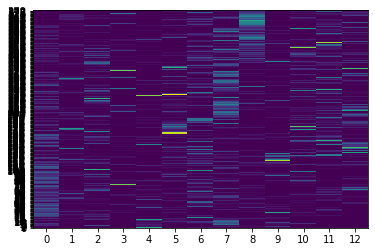

In [114]:
# Visualize topics
import matplotlib.pyplot as plt
topics_eps_df = pd.DataFrame(nmf_vecs)

topics_eps1_df = topics_eps_df
plt.pcolor(topics_eps1_df)
plt.yticks(np.arange(0.5, len(topics_eps1_df.index), 1), topics_eps1_df.index)
plt.xticks(np.arange(0.5, len(topics_eps1_df.columns), 1), topics_eps1_df.columns)
plt.show()

### Topics Dataframes
Much of the following code is adapted from https://github.com/dnlhui/Law_Order/blob/master/Model_Full_Scripts.ipynb

In [115]:
# Get words in topics dataframe

def get_nmf_topics(model, num_topics):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names_out()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict[i] = words;
    
    return pd.DataFrame(word_dict).transpose();

In [116]:
topics_df = get_nmf_topics(model=nmf,num_topics=13)
topics_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,cancer,board,procedure,attending,slept,office,aneurysm,lunch,trailer,seizure,mistake,sorry,fix,brain,married,appears,understand,lung,maybe,claim
1,wedding,dress,church,aisle,married,bride,marry,guest,minister,divorce,altar,ceremony,dance,beautiful,bridesmaid,marriage,vow,maid,food,promise
2,tumor,radiation,brain,remove,contest,gallery,diaper,risk,seed,hope,cord,flashback,wall,impossible,kill,catch,glove,wish,laugh,beverage
3,kidney,transplant,dialysis,donor,organ,match,pacemaker,flip,failure,board,renal,donate,snow,lead,sign,reading,credit,recipient,option,sorry
4,penis,rapist,organ,begin,restaurant,key,stitch,date,apartment,fish,reattachment,penile,joke,erection,insists,syphilis,broke,locker,oncall,men
5,plane,leg,crash,wood,worm,suddenly,oclock,flight,flying,seat,lying,surge,rep,captain,pilot,conference,crashed,screaming,settlement,helicopter
6,ambulance,firefighter,chest,paramedic,bomb,burn,bleeding,supply,hallway,fire,police,dead,bay,explosion,gurney,tube,injury,wound,leg,code
7,upset,leg,pregnant,sends,shocked,date,push,ultrasound,continues,hip,confused,school,drink,cancer,quickly,lead,five,note,lawyer,fight
8,therapy,pandemic,beach,tent,vent,chamber,ventilator,receives,share,icu,hyperbaric,world,invite,video,text,office,fear,stress,hotel,fracture
9,gunshot,shooting,shot,bullet,officer,police,wound,floor,cop,arm,duck,chest,lockdown,victim,cover,cleared,security,supply,dead,paper


In [117]:
# Top topic per episode
max_topic = nmf_vecs.argmax(axis = 1)
topic_df = pd.DataFrame(max_topic)
topic_df = topic_df.rename({0:"topic"},axis=1)
topic_df.head()

,topic
0,0
1,4
2,10
3,9
4,2


In [118]:
topic_df.shape

(380, 1)

In [119]:
# Top topic score per episode
max_topic_score = nmf_vecs.max(axis = 1)
topic_score_df = pd.DataFrame(max_topic_score)
topic_score_df = topic_score_df.rename({0:"score"},axis=1)
topic_score_df.head()

,score
0,0.132556
1,0.372593
2,0.165077
3,0.105594
4,0.129553


In [120]:
topic_score_df.tail()

,score
375,0.226332
376,0.177750
377,0.182536
378,0.189942
379,0.172117


In [121]:
# Episode-topic matrix
episode_topics_df = pd.DataFrame(nmf_vecs)
episode_topics_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.132556,0.000000,0.000000,0.000000,0.029900,0.000000,0.000000,0.047147,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000968,0.000000,0.372593,0.000000,0.028688,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.021834,0.139247,0.007221,0.023243,0.016600,0.000000,0.057999,0.165077,0.0,0.000000
3,0.004645,0.000000,0.000483,0.000000,0.036437,0.000000,0.000000,0.047589,0.011987,0.105594,0.000000,0.0,0.000000
4,0.061272,0.004142,0.129553,0.000000,0.030666,0.000000,0.000481,0.018041,0.011994,0.000469,0.000000,0.0,0.001417


In [122]:
# Merge episode dataframes together
eps_topic_comb_df = episodes_df.merge(topic_df,how='outer', left_index=True, right_index=True)
eps_topic_comb_df = eps_topic_comb_df.merge(topic_score_df,how='outer', left_index=True, right_index=True)
eps_topic_comb_df = eps_topic_comb_df.merge(episode_topics_df,how='outer', left_index=True, right_index=True)
eps_topic_comb_df = eps_topic_comb_df.drop(["ep_summary","index"],axis=1)
eps_topic_comb_df.head()

,ep_name,season,topic,score,0,1,2,3,4,5,6,7,8,9,10,11,12
0,A Hard Day's Night,1,0,0.132556,0.132556,0.000000,0.000000,0.000000,0.029900,0.000000,0.000000,0.047147,0.000000,0.000000,0.000000,0.0,0.000000
1,The First Cut Is the Deepest,1,4,0.372593,0.000000,0.000000,0.000968,0.000000,0.372593,0.000000,0.028688,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,"Winning a Battle, Losing the War",1,10,0.165077,0.000000,0.000000,0.000000,0.021834,0.139247,0.007221,0.023243,0.016600,0.000000,0.057999,0.165077,0.0,0.000000
3,No Man's Land,1,9,0.105594,0.004645,0.000000,0.000483,0.000000,0.036437,0.000000,0.000000,0.047589,0.011987,0.105594,0.000000,0.0,0.000000
4,If Tomorrow Never Comes,1,2,0.129553,0.061272,0.004142,0.129553,0.000000,0.030666,0.000000,0.000481,0.018041,0.011994,0.000469,0.000000,0.0,0.001417


### Naming Topics

In [123]:
top_eps_per_topic = eps_topic_comb_df.sort_values(['topic','score'],ascending=False)[["ep_name","topic","score"]].groupby('topic').head(5)


In [124]:
# Look up summaries for the top eps in each topic for more insight on naming the topics (0 and 7 are the most vague)
top_eps_per_topic[top_eps_per_topic["topic"]==7]

,ep_name,topic,score
228,I Feel the Earth Move,7,0.271343
343,Let's All Go to the Bar,7,0.264569
216,Got to Be Real,7,0.258577
12,Something to Talk About,7,0.245389
276,Civil War,7,0.243740


In [125]:
topic_dict = {0:"Doctor Drama", 1:"Wedding", 2:"Brain Tumor", 3:"Kidney Transplant",
             4:"Penis Problem", 5:"Plane Crash", 6:"Fire Emergency", 7:"Hospital Politics/Relationships", 
              8:"Turmoil/Covid", 9:"Shooting", 10:"Liver Transplant", 11:"Holiday/Celebration", 12:"Clinical Trial"}

In [126]:
# Map topic names to episode table using topic dictionary
topic_names_df = eps_topic_comb_df.rename(topic_dict,axis=1)
topic_names_df["topic"] = topic_names_df["topic"].map(topic_dict)

In [127]:
topic_names_df.head()

,ep_name,season,topic,score,Doctor Drama,Wedding,Brain Tumor,Kidney Transplant,Penis Problem,Plane Crash,Fire Emergency,Hospital Politics/Relationships,Turmoil/Covid,Shooting,Liver Transplant,Holiday/Celebration,Clinical Trial
0,A Hard Day's Night,1,Doctor Drama,0.132556,0.132556,0.000000,0.000000,0.000000,0.029900,0.000000,0.000000,0.047147,0.000000,0.000000,0.000000,0.0,0.000000
1,The First Cut Is the Deepest,1,Penis Problem,0.372593,0.000000,0.000000,0.000968,0.000000,0.372593,0.000000,0.028688,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,"Winning a Battle, Losing the War",1,Liver Transplant,0.165077,0.000000,0.000000,0.000000,0.021834,0.139247,0.007221,0.023243,0.016600,0.000000,0.057999,0.165077,0.0,0.000000
3,No Man's Land,1,Shooting,0.105594,0.004645,0.000000,0.000483,0.000000,0.036437,0.000000,0.000000,0.047589,0.011987,0.105594,0.000000,0.0,0.000000
4,If Tomorrow Never Comes,1,Brain Tumor,0.129553,0.061272,0.004142,0.129553,0.000000,0.030666,0.000000,0.000481,0.018041,0.011994,0.000469,0.000000,0.0,0.001417


In [128]:
# Export as csv
topic_names_df.to_csv("episodes_by_topic.csv")

In [129]:
# Merge topic names with word table
topic_words_df = topic_count_df.merge(topics_df,how='outer', left_index=True, right_index=True)
topic_words_df = topic_words_df.rename(topic_dict,axis=0)
topic_words_df.head(10)

,num_eps,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
Doctor Drama,73,cancer,board,procedure,attending,slept,office,aneurysm,lunch,trailer,...,mistake,sorry,fix,brain,married,appears,understand,lung,maybe,claim
Wedding,13,wedding,dress,church,aisle,married,bride,marry,guest,minister,...,altar,ceremony,dance,beautiful,bridesmaid,marriage,vow,maid,food,promise
Brain Tumor,24,tumor,radiation,brain,remove,contest,gallery,diaper,risk,seed,...,cord,flashback,wall,impossible,kill,catch,glove,wish,laugh,beverage
Kidney Transplant,9,kidney,transplant,dialysis,donor,organ,match,pacemaker,flip,failure,...,renal,donate,snow,lead,sign,reading,credit,recipient,option,sorry
Penis Problem,10,penis,rapist,organ,begin,restaurant,key,stitch,date,apartment,...,reattachment,penile,joke,erection,insists,syphilis,broke,locker,oncall,men
Plane Crash,15,plane,leg,crash,wood,worm,suddenly,oclock,flight,flying,...,lying,surge,rep,captain,pilot,conference,crashed,screaming,settlement,helicopter
Fire Emergency,43,ambulance,firefighter,chest,paramedic,bomb,burn,bleeding,supply,hallway,...,police,dead,bay,explosion,gurney,tube,injury,wound,leg,code
Hospital Politics/Relationships,59,upset,leg,pregnant,sends,shocked,date,push,ultrasound,continues,...,confused,school,drink,cancer,quickly,lead,five,note,lawyer,fight
Turmoil/Covid,43,therapy,pandemic,beach,tent,vent,chamber,ventilator,receives,share,...,hyperbaric,world,invite,video,text,office,fear,stress,hotel,fracture
Shooting,13,gunshot,shooting,shot,bullet,officer,police,wound,floor,cop,...,duck,chest,lockdown,victim,cover,cleared,security,supply,dead,paper


In [130]:
# Export as csv
topic_words_df.to_csv("episodes_topic_words.csv")

In [131]:
# Pickle the model
import pickle

with open('episode_model.pkl', 'wb') as picklefile:
    pickle.dump(nmf_vecs, picklefile)